In [1]:
from collections import defaultdict
import matplotlib.pyplot as plt
def load_data(file_path, base_dir, max_per_class=None):
    image_paths = defaultdict(list)
    labels = []
    
    with open(file_path, 'r') as f:
        for line in f:
            parts = line.split('/')
            class_name = parts[0].strip()
            img_path = f"{base_dir}/{class_name}/{parts[1].strip()}"
            image_paths[class_name].append(img_path)
    
    # Restrict the number of images per class
    final_image_paths = []
    final_labels = []
    for class_name, paths in image_paths.items():
        if max_per_class:
            paths = paths[:max_per_class]  # Limit to max_per_class images
        final_image_paths.extend(paths)
        final_labels.extend([class_name] * len(paths))
    
    return final_image_paths, final_labels

train_image_paths, train_labels = load_data(
    '/Users/aariziqbal/Desktop/Homework/ECS_174/project/ECS_174_FoodClassification/food-101/meta/train.txt',
    '/Users/aariziqbal/Desktop/Homework/ECS_174/project/ECS_174_FoodClassification/food-101/images',
    max_per_class=130  # Take at most 50 images per class
)
test_image_paths, test_labels = load_data(
    '/Users/aariziqbal/Desktop/Homework/ECS_174/project/ECS_174_FoodClassification/food-101/meta/test.txt',
    '/Users/aariziqbal/Desktop/Homework/ECS_174/project/ECS_174_FoodClassification/food-101/images',
    max_per_class=40  # Take at most 20 images per class
)



# Show a few images



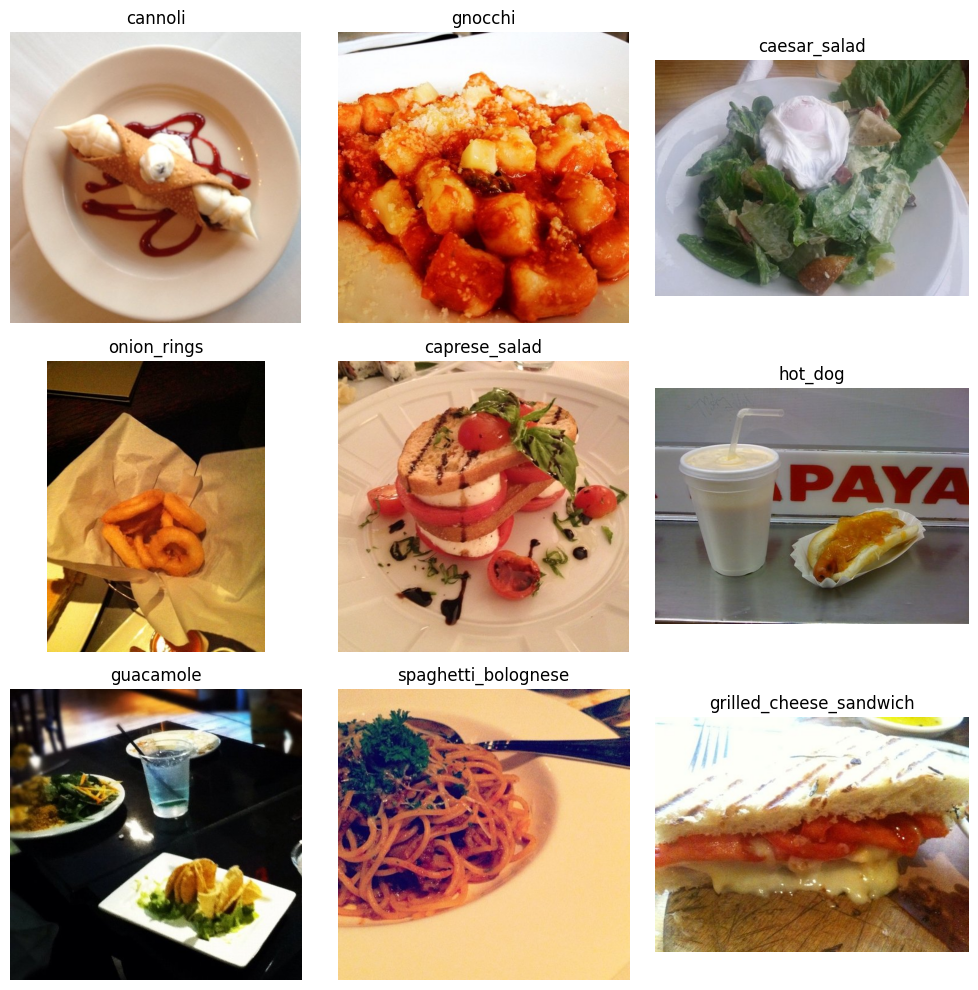

In [2]:
from PIL import Image
import matplotlib.pyplot as plt

import random
from PIL import Image
import matplotlib.pyplot as plt
from collections import defaultdict

def sample_random_images(image_paths, labels, num_classes=9):
    """
    Randomly sample one image from each class and display them.

    :param image_paths: List of image file paths
    :param labels: List of labels corresponding to the images
    :param num_classes: Number of classes to sample and display
    """
    # Group image paths by their class
    class_to_images = defaultdict(list)
    for img_path, label in zip(image_paths, labels):
        class_to_images[label].append(img_path)

    # Randomly sample a class and an image from that class
    sampled_classes = random.sample(list(class_to_images.keys()), min(num_classes, len(class_to_images)))
    sampled_images = [(random.choice(class_to_images[cls]), cls) for cls in sampled_classes]

    # Display the sampled images
    plt.figure(figsize=(10, 10))
    for i, (img_path, cls) in enumerate(sampled_images):
        img = Image.open(str(img_path + '.jpg'))
        plt.subplot(3, 3, i + 1)
        plt.imshow(img)
        plt.title(cls)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Sample and display random images from each class in training data
sample_random_images(train_image_paths, train_labels, num_classes=9)





There are 101 classes 